In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('students_mental_health_survey.csv')

In [63]:
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


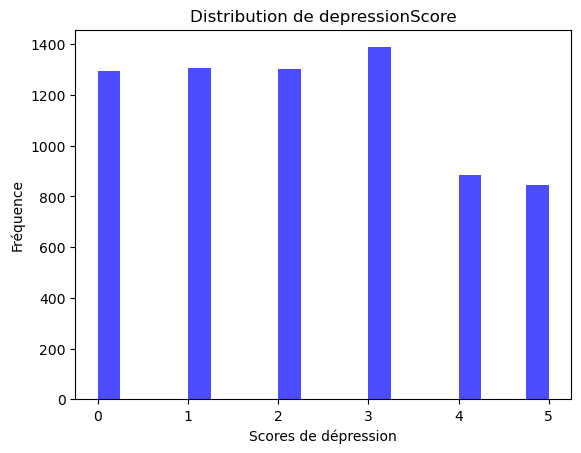

In [64]:
plt.hist(df['Depression_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution de depressionScore')
plt.xlabel('Scores de dépression')
plt.ylabel('Fréquence')
plt.show()

In [65]:

# Définir les seuils basés sur des quantiles (ou choisissez manuellement des valeurs)
low_threshold = df['Depression_Score'].quantile(0.33)  # Faibles : premier tiers
high_threshold = df['Depression_Score'].quantile(0.66)  # Élevés : dernier tiers

print(f"Seuil faible : {low_threshold:.2f}")
print(f"Seuil élevé : {high_threshold:.2f}")

# Créer les classes
def categorize_score(score):
    if score < low_threshold:
        return 'faible'
    elif low_threshold <= score <= high_threshold:
        return 'moyen'
    else:
        return 'élevé'

df['depressionCategory'] = df['Depression_Score'].apply(categorize_score)

# Vérifier la transformation
print(df[['Depression_Score', 'depressionCategory']].head())
print(df['depressionCategory'].value_counts())

Seuil faible : 1.00
Seuil élevé : 3.00
   Depression_Score depressionCategory
0                 3              moyen
1                 3              moyen
2                 0             faible
3                 1              moyen
4                 3              moyen
depressionCategory
moyen     4000
élevé     1727
faible    1295
Name: count, dtype: int64


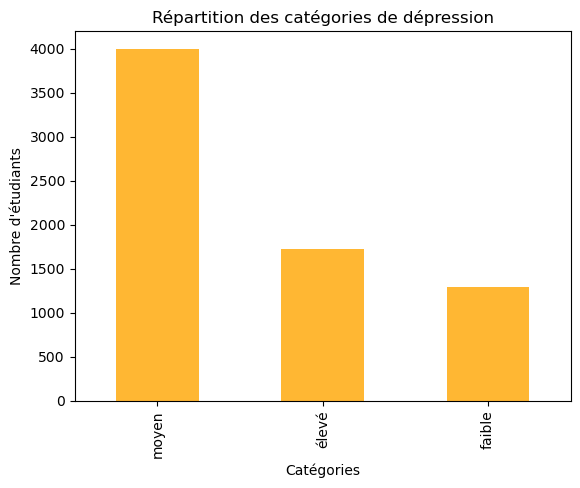

In [66]:
df['depressionCategory'].value_counts().plot(kind='bar', color='orange', alpha=0.8)
plt.title('Répartition des catégories de dépression')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'étudiants')
plt.show()


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [68]:
df.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7010.00000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.49127,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.28742,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.44000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.29000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.50000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.70000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.00000,5.000000,5.000000,5.000000,5.000000,29.000000


In [69]:
df.describe(include='object')

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type,depressionCategory
count,7022,7022,7022,7022,7022,7022,7022,7007,7022,7022,7022,7022,7022,7022
unique,6,2,3,3,3,3,3,3,3,2,2,3,3,3
top,Medical,Male,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,Moderate,On-Campus,moyen
freq,2105,3547,3589,3521,4268,3470,3574,5903,4263,4866,6678,3440,2815,4000


In [70]:
df.isnull().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
depressionCategory              0
dtype: int64

In [71]:


# Proportion de valeurs manquantes
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPourcentage de valeurs manquantes :")
print(missing_percentage)




Pourcentage de valeurs manquantes :
Age                            0.000000
Course                         0.000000
Gender                         0.000000
CGPA                           0.170891
Stress_Level                   0.000000
Depression_Score               0.000000
Anxiety_Score                  0.000000
Sleep_Quality                  0.000000
Physical_Activity              0.000000
Diet_Quality                   0.000000
Social_Support                 0.000000
Relationship_Status            0.000000
Substance_Use                  0.213614
Counseling_Service_Use         0.000000
Family_History                 0.000000
Chronic_Illness                0.000000
Financial_Stress               0.000000
Extracurricular_Involvement    0.000000
Semester_Credit_Load           0.000000
Residence_Type                 0.000000
depressionCategory             0.000000
dtype: float64


In [72]:
df['CGPA'].fillna(df['CGPA'].median(), inplace=True)


In [73]:
df['Substance_Use'].fillna(df['Substance_Use'].mode()[0], inplace=True)


In [74]:
 df.duplicated().sum()

0

In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Définir les colonnes numériques
numerical_cols = ['Age', 'Semester_Credit_Load']

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation aux colonnes numériques
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


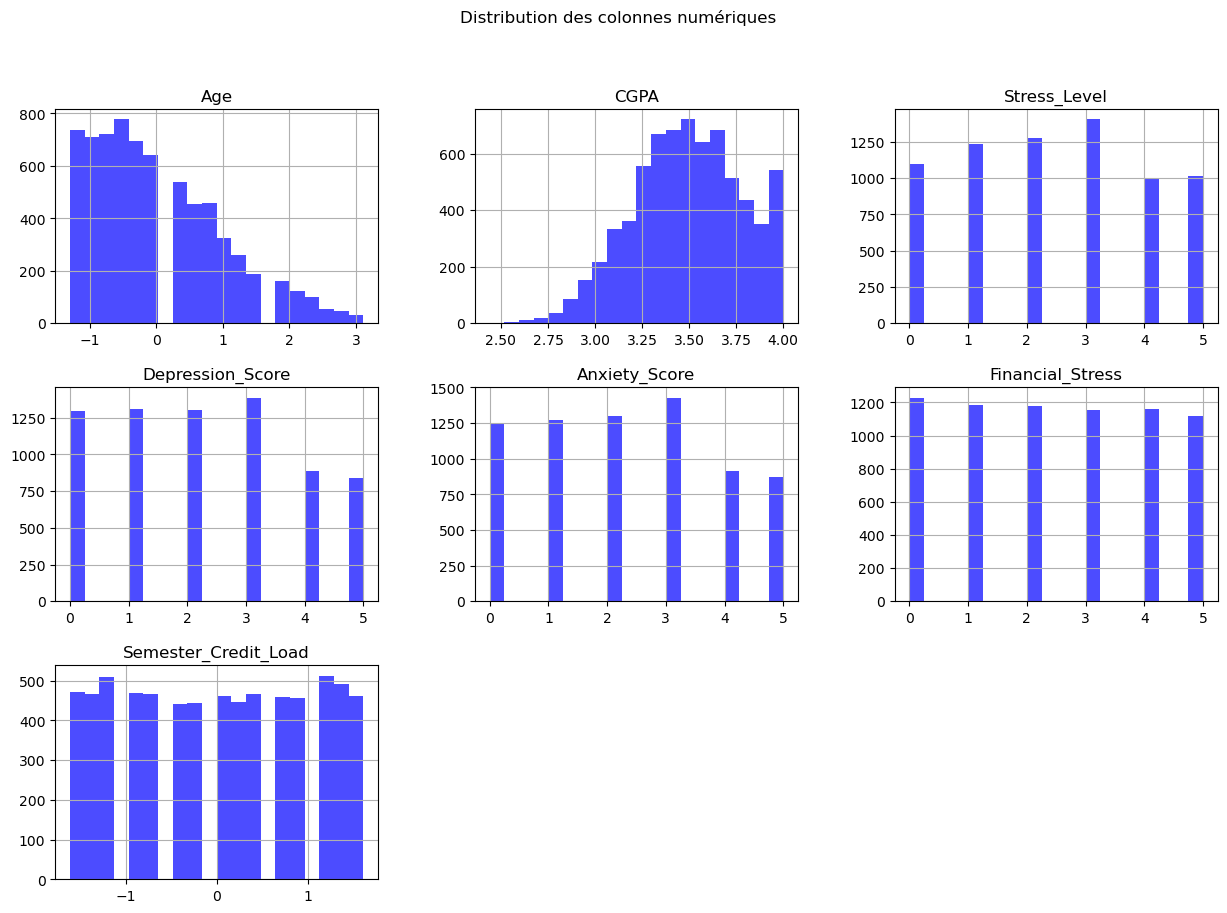

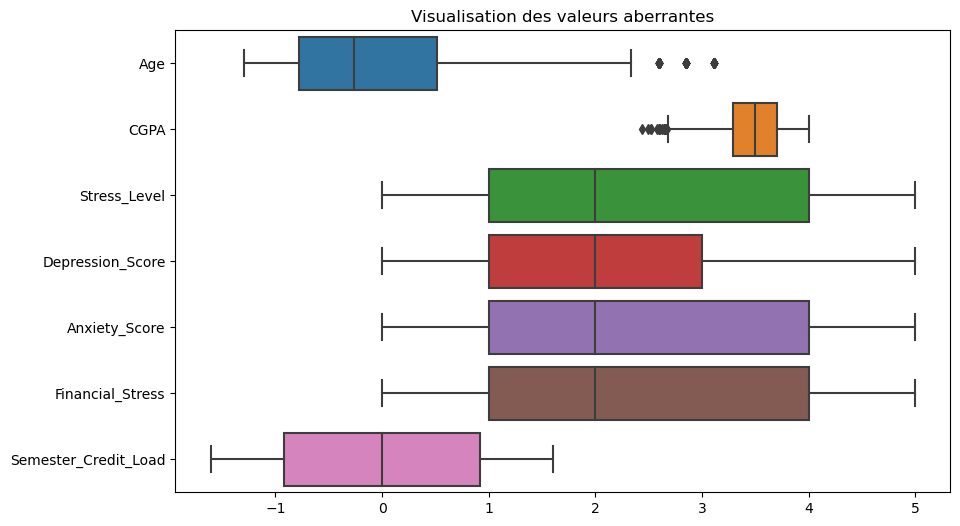

In [102]:

df.hist(bins=20, figsize=(15, 10), color='blue', alpha=0.7)
plt.suptitle('Distribution des colonnes numériques')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title('Visualisation des valeurs aberrantes')
plt.show()


In [103]:
import pandas as pd



# Fonction pour supprimer les valeurs aberrantes en utilisant la méthode IQR
def remove_outliers(df, column):
    # Calcul des quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les données en gardant uniquement celles dans la plage définie
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la fonction de suppression des valeurs aberrantes pour 'Age' et 'CGPA'
data_cleaned = remove_outliers(df, 'Age')
data_cleaned = remove_outliers(data_cleaned, 'CGPA')




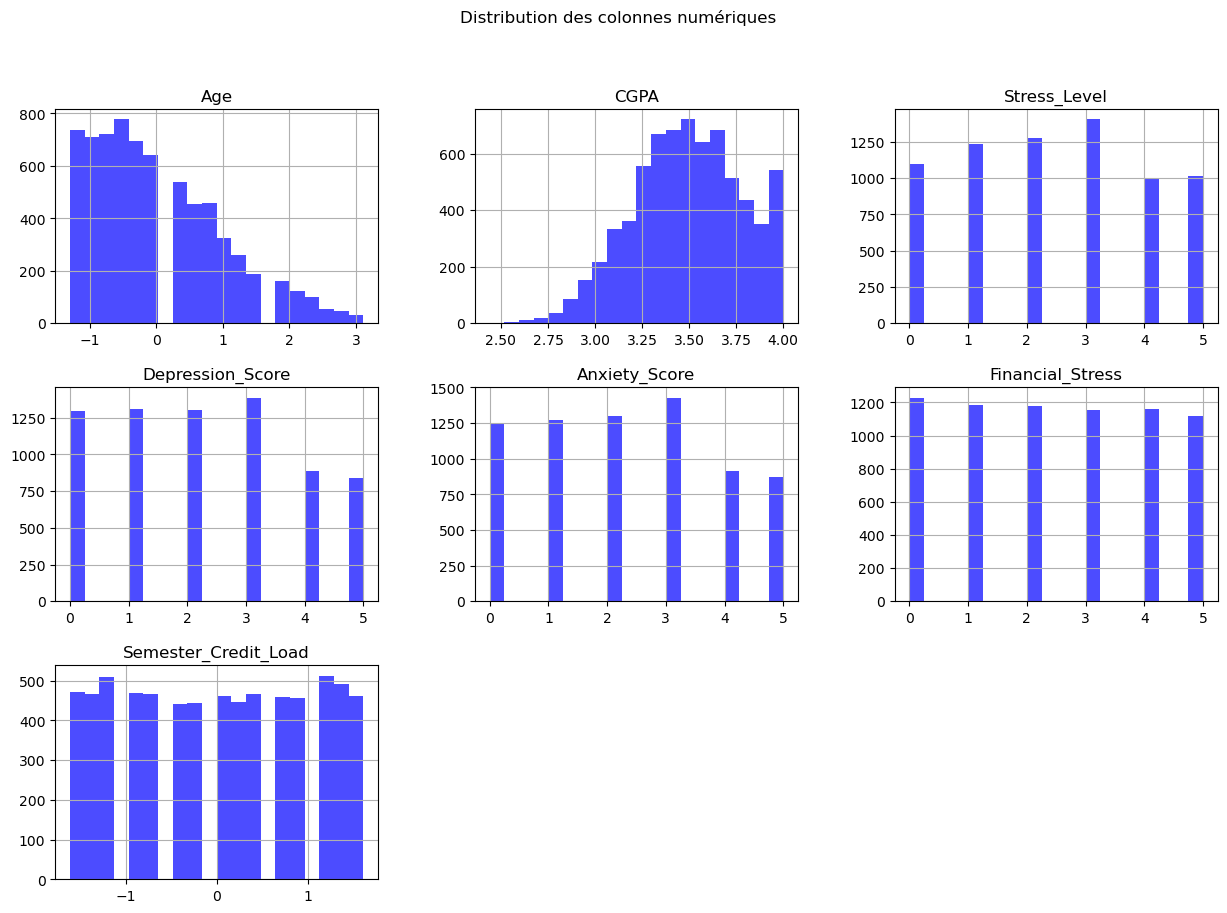

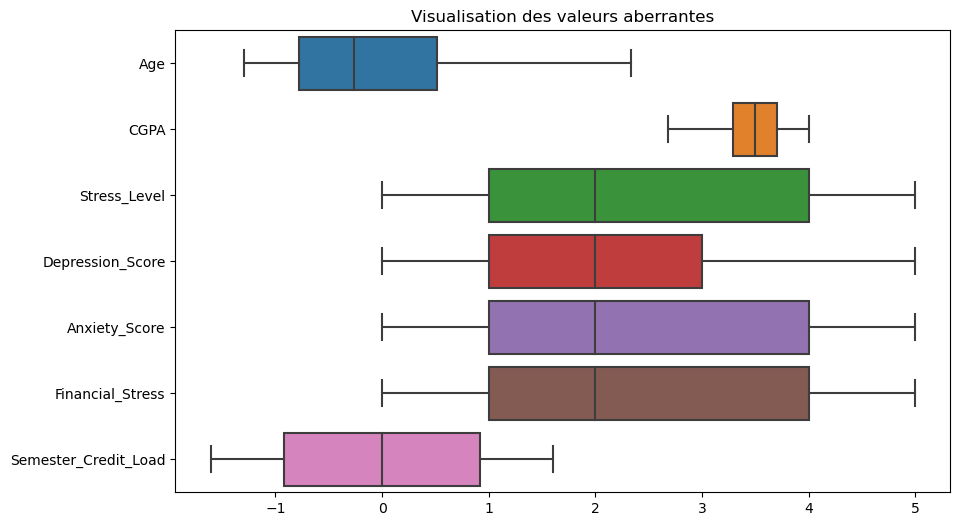

In [104]:

df.hist(bins=20, figsize=(15, 10), color='blue', alpha=0.7)
plt.suptitle('Distribution des colonnes numériques')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned .select_dtypes(include='number'), orient='h')
plt.title('Visualisation des valeurs aberrantes')
plt.show()



Répartition des valeurs uniques dans Course :
Course
Medical             2105
Law                 1385
Engineering         1072
Computer Science    1028
Business             717
Others               715
Name: count, dtype: int64


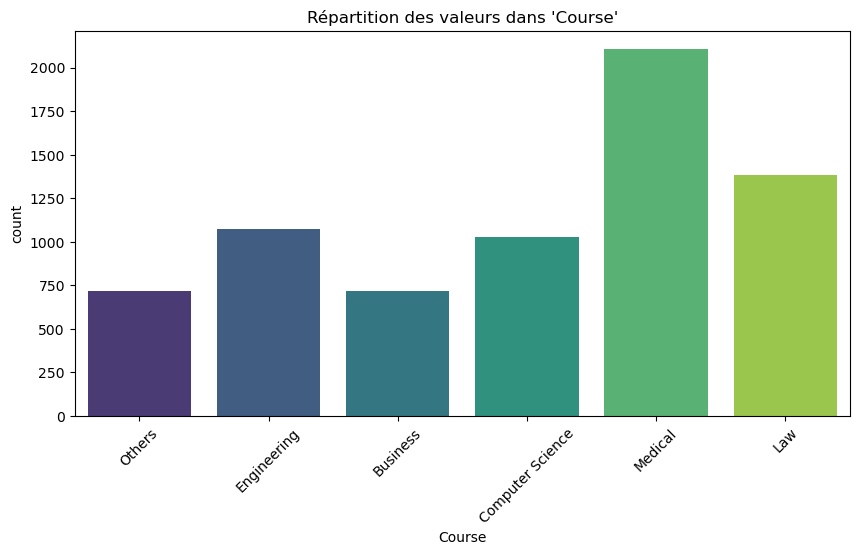


Répartition des valeurs uniques dans Gender :
Gender
Male      3547
Female    3475
Name: count, dtype: int64


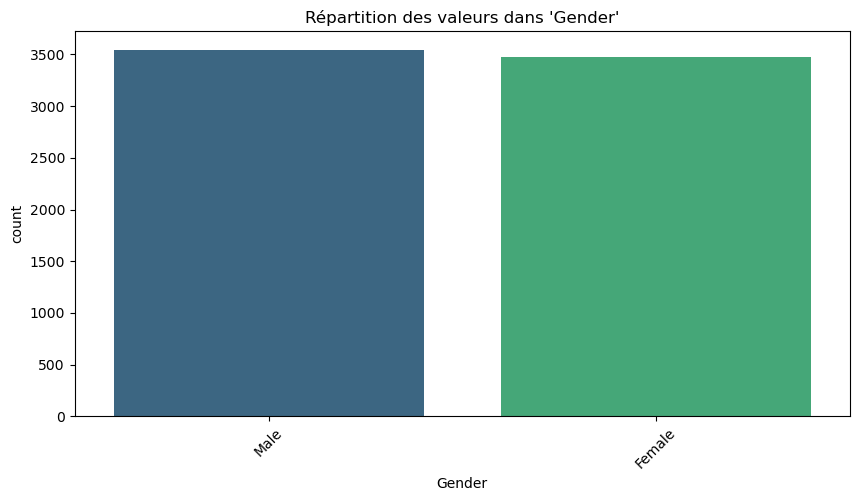


Répartition des valeurs uniques dans Sleep_Quality :
Sleep_Quality
Good       3589
Average    2735
Poor        698
Name: count, dtype: int64


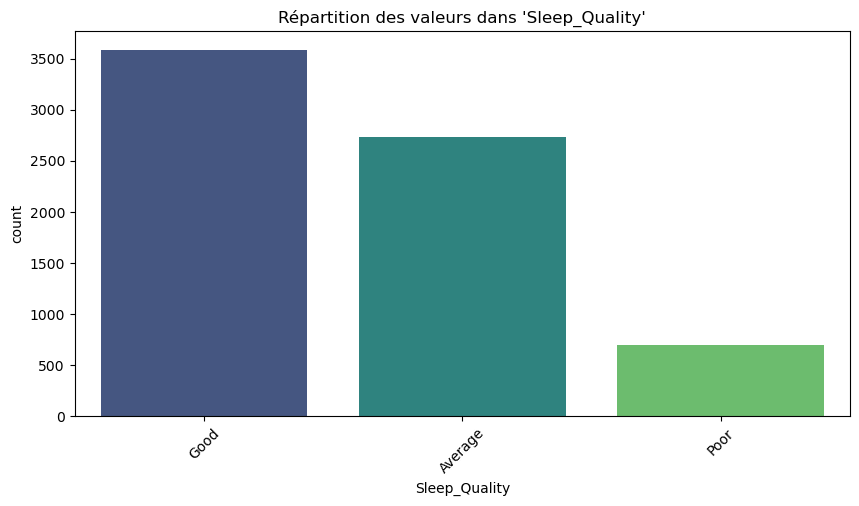


Répartition des valeurs uniques dans Physical_Activity :
Physical_Activity
Moderate    3521
Low         2091
High        1410
Name: count, dtype: int64


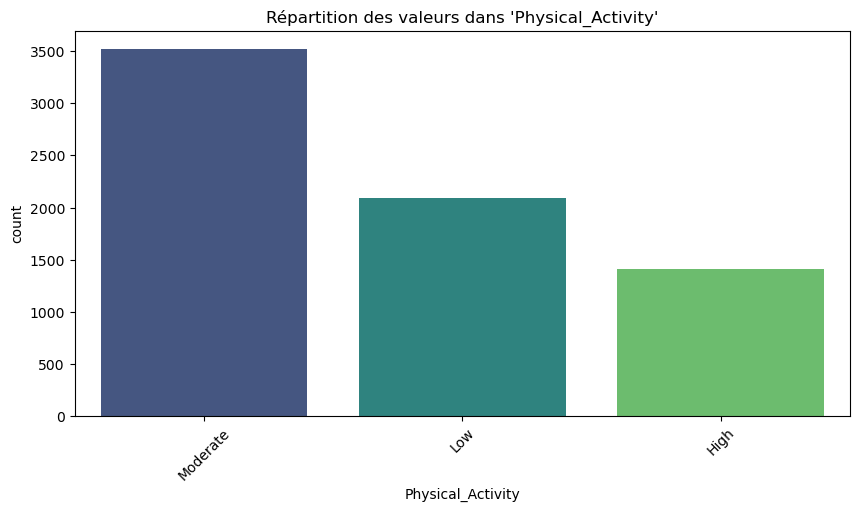


Répartition des valeurs uniques dans Diet_Quality :
Diet_Quality
Average    4268
Good       1385
Poor       1369
Name: count, dtype: int64


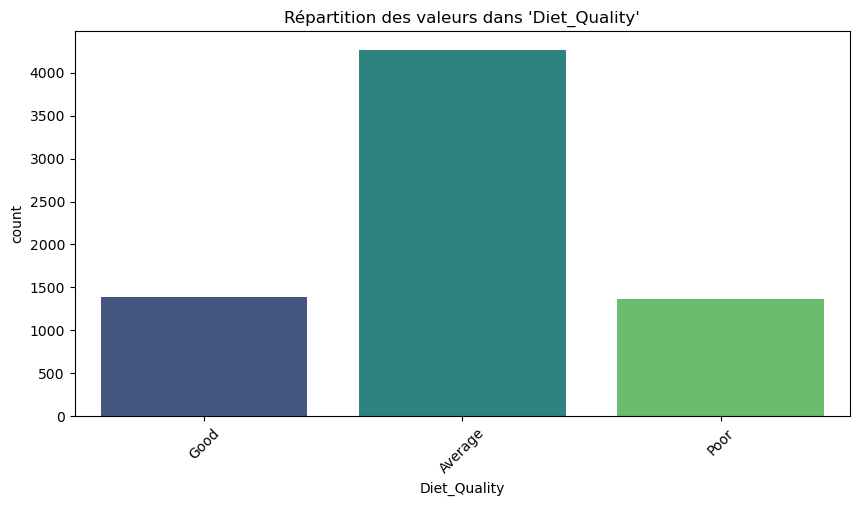


Répartition des valeurs uniques dans Social_Support :
Social_Support
Moderate    3470
High        2176
Low         1376
Name: count, dtype: int64


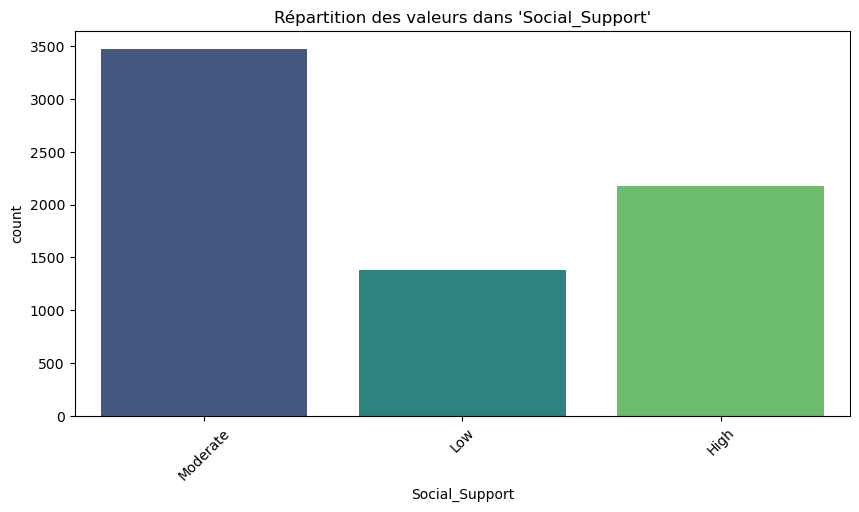


Répartition des valeurs uniques dans Relationship_Status :
Relationship_Status
Single               3574
In a Relationship    2079
Married              1369
Name: count, dtype: int64


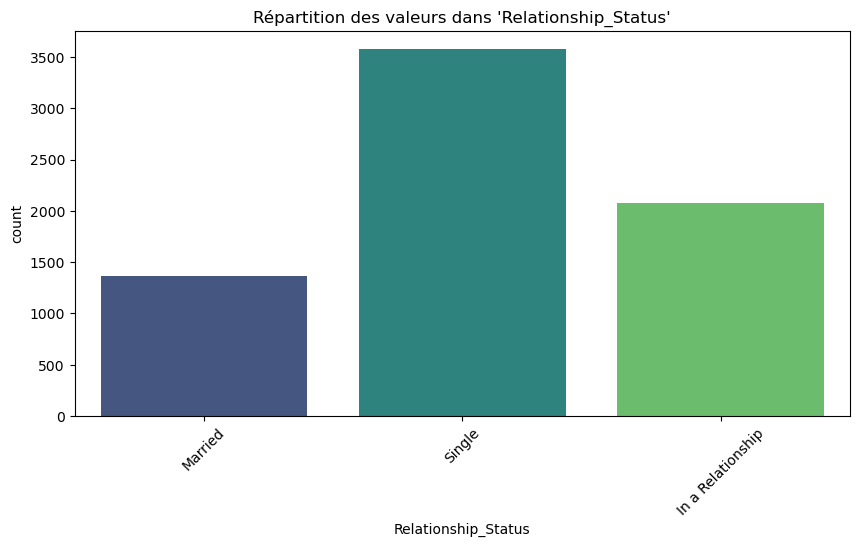


Répartition des valeurs uniques dans Substance_Use :
Substance_Use
Never           5918
Occasionally     699
Frequently       405
Name: count, dtype: int64


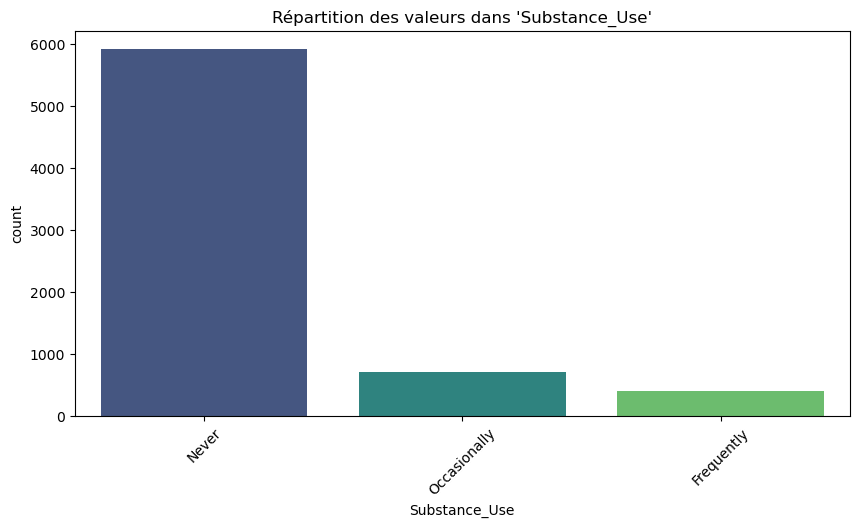


Répartition des valeurs uniques dans Counseling_Service_Use :
Counseling_Service_Use
Never           4263
Occasionally    2081
Frequently       678
Name: count, dtype: int64


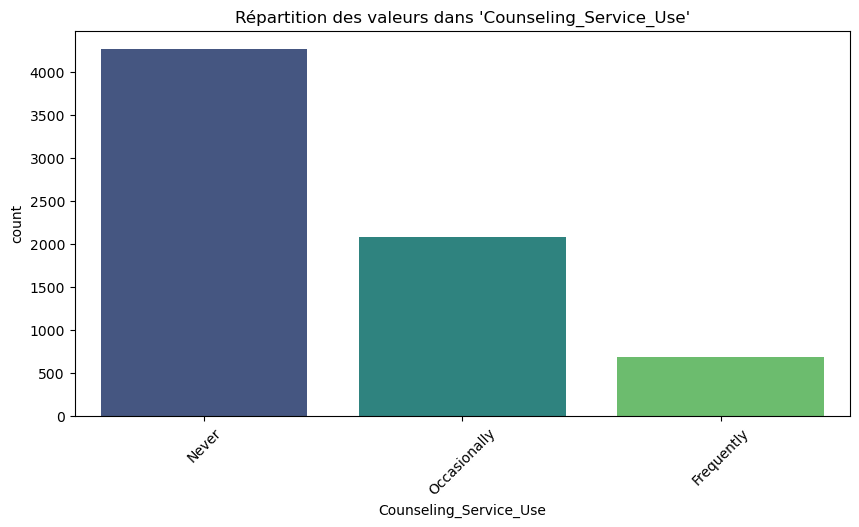


Répartition des valeurs uniques dans Family_History :
Family_History
No     4866
Yes    2156
Name: count, dtype: int64


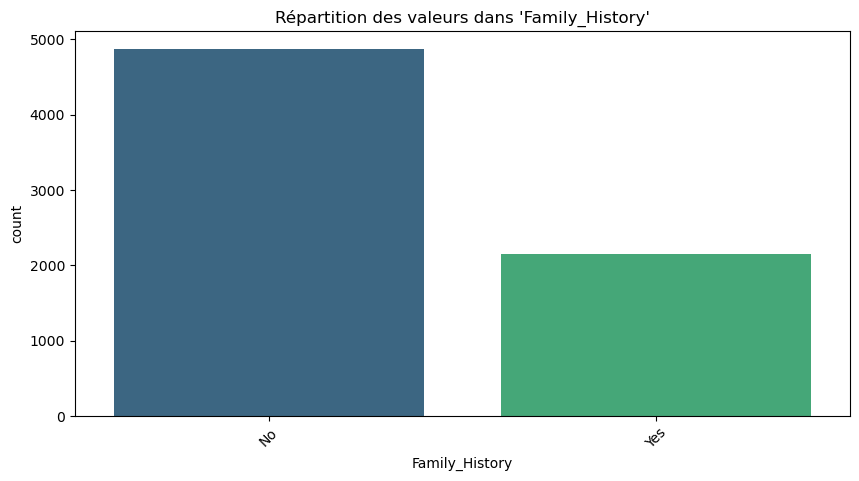


Répartition des valeurs uniques dans Chronic_Illness :
Chronic_Illness
No     6678
Yes     344
Name: count, dtype: int64


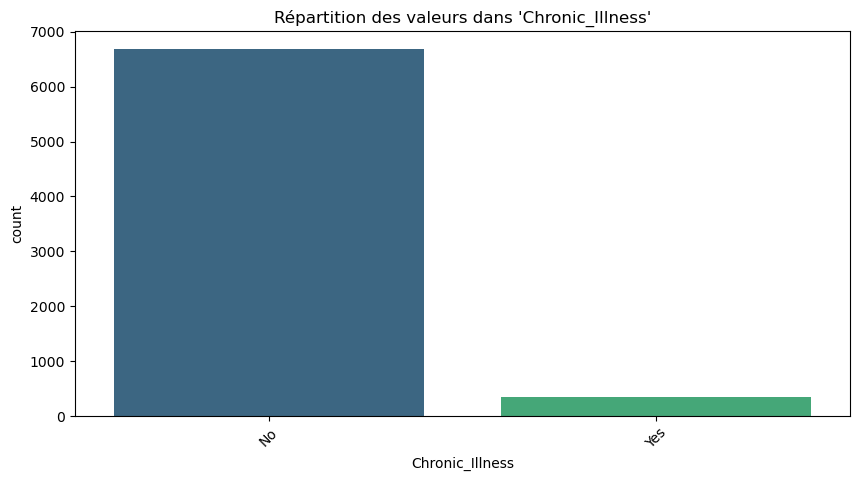


Répartition des valeurs uniques dans Extracurricular_Involvement :
Extracurricular_Involvement
Moderate    3440
Low         2164
High        1418
Name: count, dtype: int64


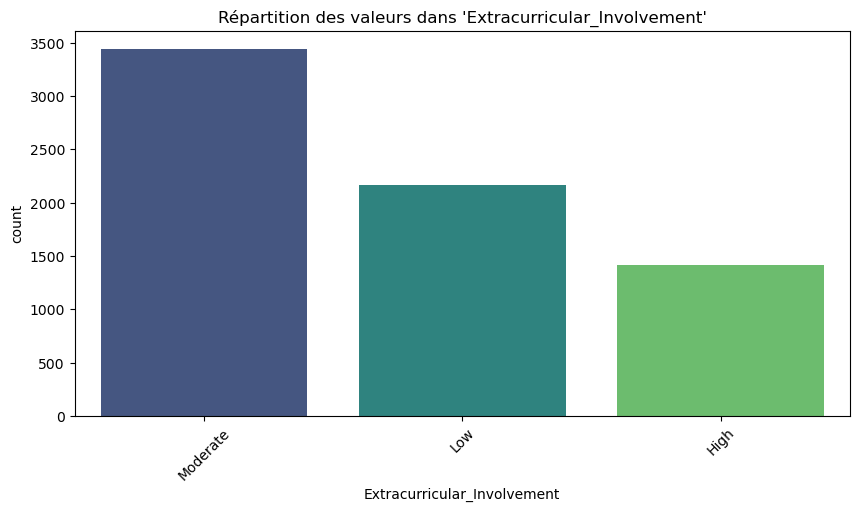


Répartition des valeurs uniques dans Residence_Type :
Residence_Type
On-Campus      2815
Off-Campus     2788
With Family    1419
Name: count, dtype: int64


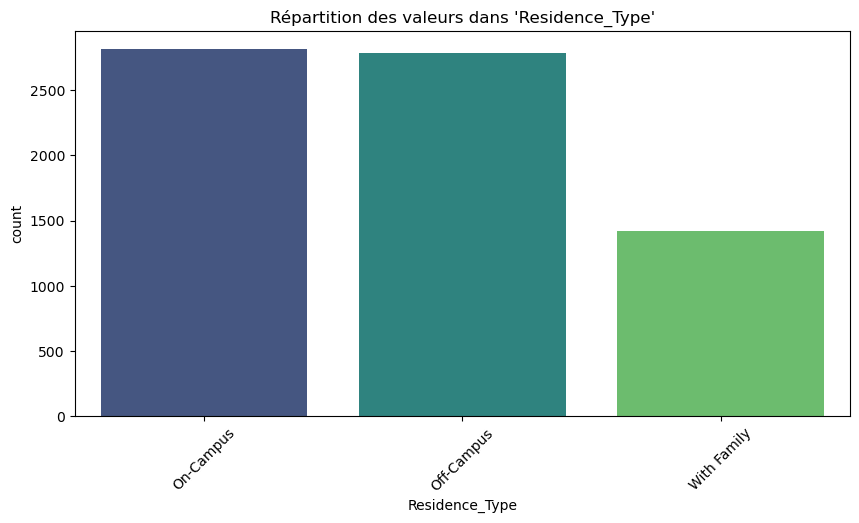


Répartition des valeurs uniques dans depressionCategory :
depressionCategory
moyen     4000
élevé     1727
faible    1295
Name: count, dtype: int64


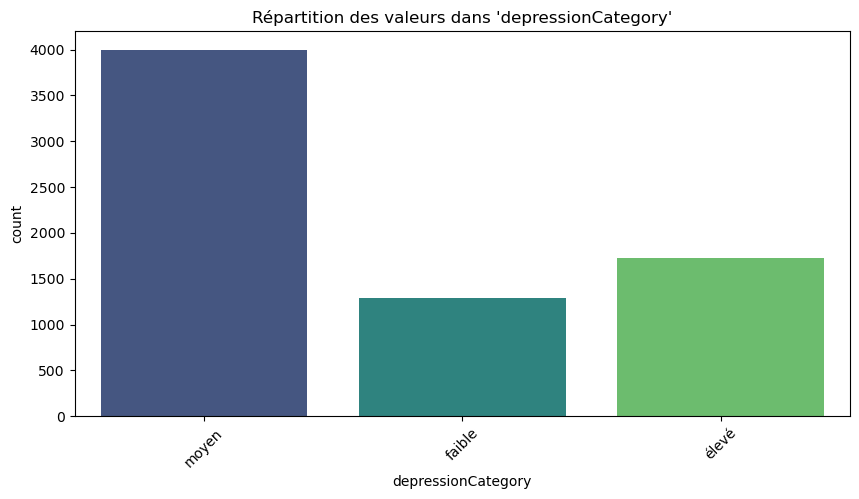

In [105]:
# Répartition des catégories pour chaque colonne catégorique
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nRépartition des valeurs uniques dans {col} :")
    print(df[col].value_counts())

    # Visualisation
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Répartition des valeurs dans '{col}'")
    plt.xticks(rotation=45)
    plt.show()


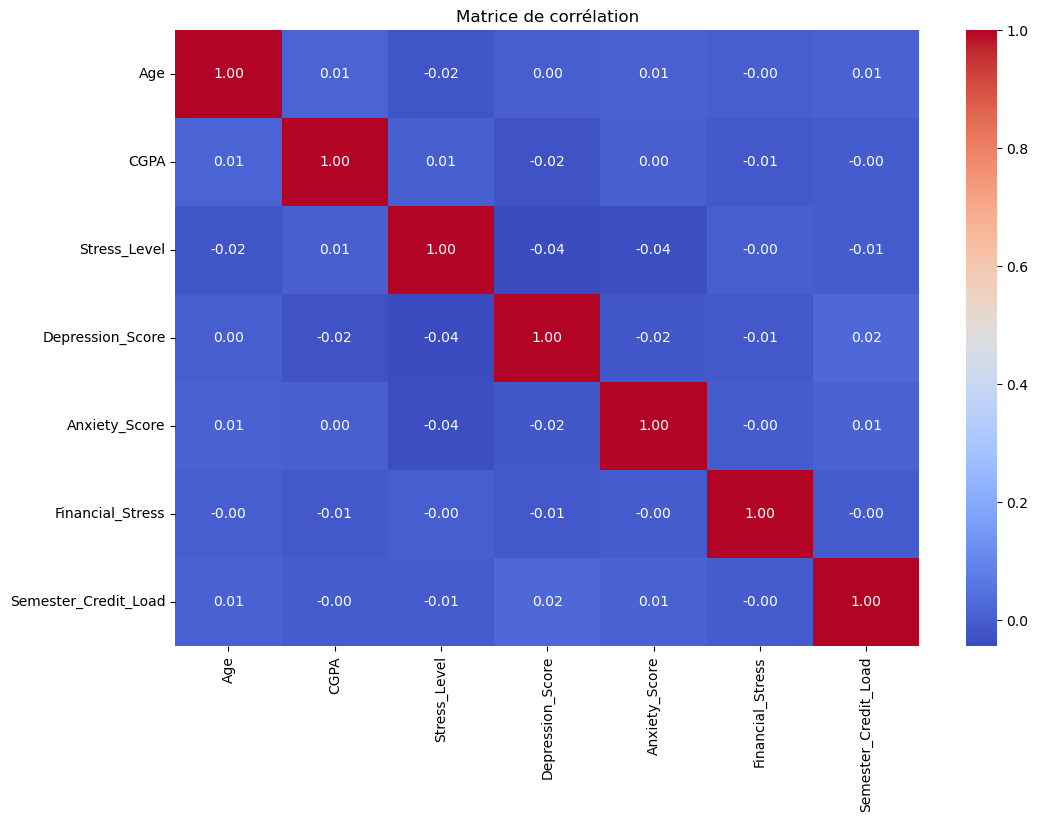

In [106]:
# Sélectionner uniquement les colonnes numériques
numerical_df = df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation sur les données numériques
correlation_matrix = numerical_df.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()



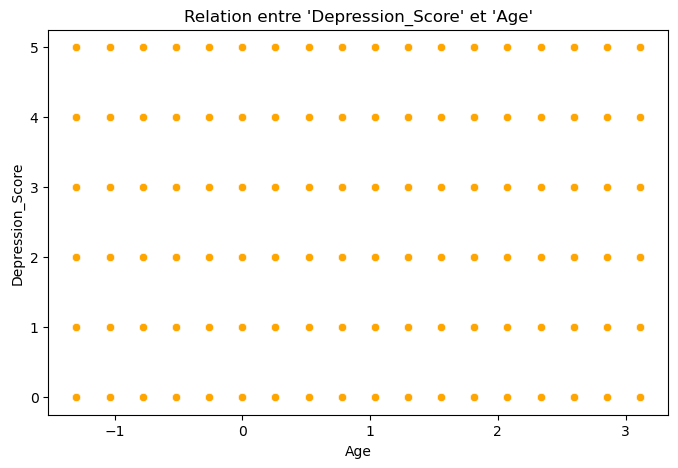

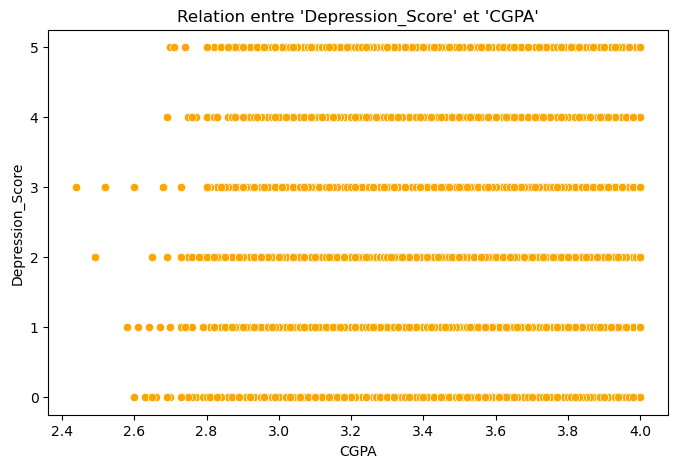

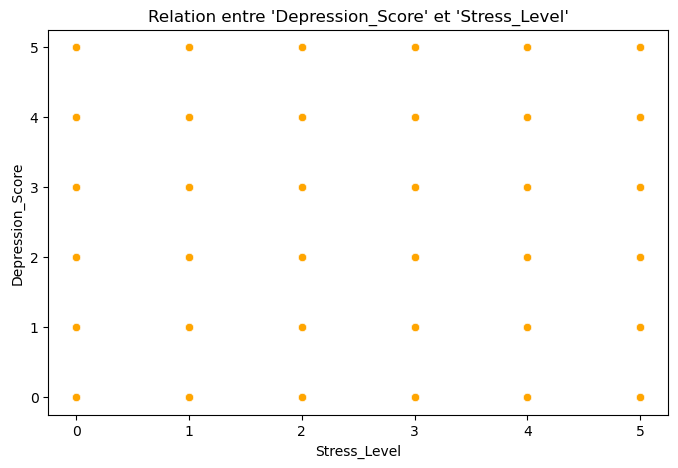

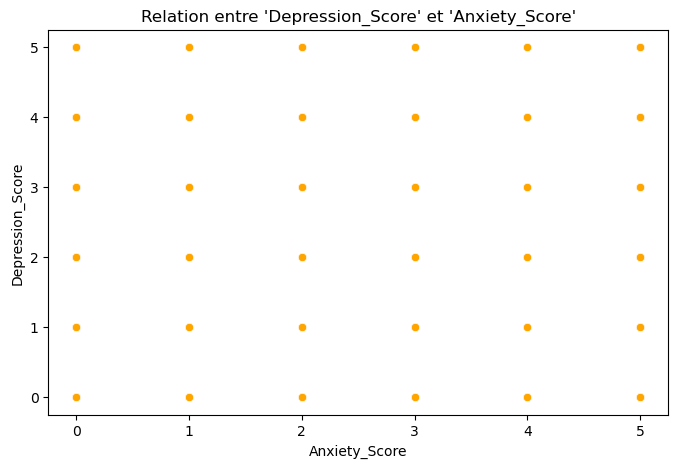

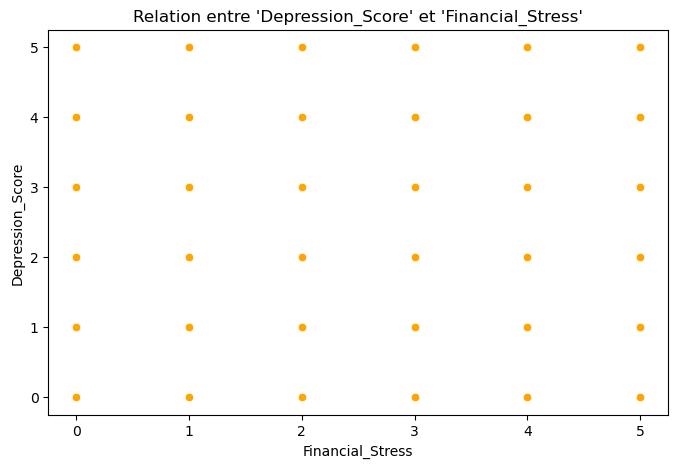

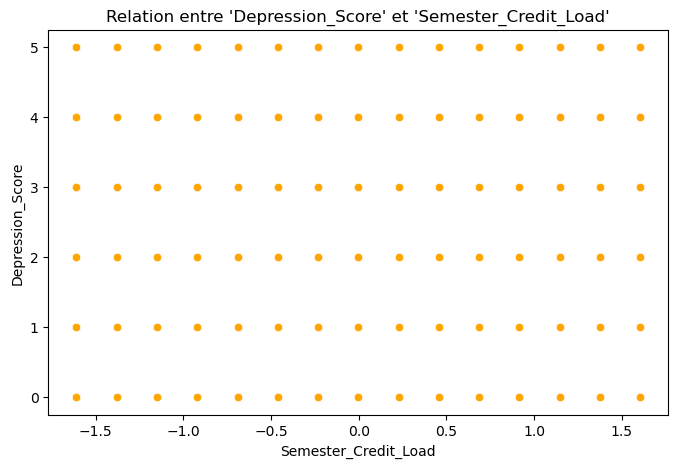

In [107]:
for col in df.select_dtypes(include='number').columns:
    if col != 'Depression_Score':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=col, y='Depression_Score', data=df, color='orange')
        plt.title(f"Relation entre 'Depression_Score' et '{col}'")
        plt.xlabel(col)
        plt.ylabel('Depression_Score')
        plt.show()


C:\Users\WSI\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

In [122]:
from sklearn.preprocessing import LabelEncoder

# Vérifiez la présence de la colonne depressionCategory
print(df.columns)

# Si la colonne existe, vous pouvez appliquer le LabelEncoder
y = df['depressionCategory']  # Variable cible

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Vérifier le résultat de l'encodage
print(y_encoded[:10])  # Afficher les 10 premières valeurs encodées


Index(['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
       'Social_Support', 'Relationship_Status', 'Substance_Use',
       'Counseling_Service_Use', 'Family_History', 'Chronic_Illness',
       'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type', 'depressionCategory'],
      dtype='object')
[1 1 0 1 1 2 1 1 1 2]


In [123]:
df

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,...,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,depressionCategory
0,0.518094,Others,Male,3.56,3,3,2,Good,Moderate,Good,...,Married,Never,Never,No,No,2,Moderate,-1.149715,On-Campus,moyen
1,0.258604,Engineering,Female,2.44,0,3,0,Average,Low,Average,...,Single,Occasionally,Occasionally,No,No,3,Low,1.144879,On-Campus,moyen
2,-1.038850,Business,Female,3.74,4,0,3,Good,Low,Average,...,In a Relationship,Never,Occasionally,No,No,4,High,-1.608634,On-Campus,faible
3,-1.038850,Computer Science,Male,3.65,2,1,0,Average,Low,Average,...,Single,Never,Never,No,No,4,Moderate,-0.461337,Off-Campus,moyen
4,-1.298340,Business,Male,3.40,3,3,4,Good,Low,Average,...,Married,Never,Never,No,Yes,0,High,0.227041,On-Campus,moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,-0.779359,Law,Female,3.69,3,1,5,Good,Low,Poor,...,Single,Never,Frequently,Yes,No,1,High,0.915420,Off-Campus,moyen
7018,0.258604,Medical,Female,3.73,3,4,1,Good,Moderate,Average,...,Single,Never,Occasionally,No,No,3,Low,-1.608634,Off-Campus,élevé
7019,0.777585,Others,Male,3.65,4,5,1,Good,High,Poor,...,Married,Never,Occasionally,No,Yes,4,Moderate,-1.149715,Off-Campus,élevé
7020,0.258604,Medical,Male,3.65,4,3,4,Average,High,Poor,...,Single,Never,Never,No,Yes,4,Moderate,-0.920256,Off-Campus,moyen


In [124]:

# 2. Identifier les colonnes catégoriques dans X (exclure les colonnes numériques)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Encodage OneHot des variables catégoriques
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' pour éviter la multicolinéarité
encoded_cols = encoder.fit_transform(X[categorical_columns])

# Créer un DataFrame pour les colonnes encodées
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_columns))

# Joindre les colonnes encodées au DataFrame principal et supprimer les colonnes originales catégoriques
X = pd.concat([X.drop(columns=categorical_columns), encoded_df], axis=1)

C:\Users\WSI\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
df

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,...,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,depressionCategory
0,0.518094,Others,Male,3.56,3,3,2,Good,Moderate,Good,...,Married,Never,Never,No,No,2,Moderate,-1.149715,On-Campus,moyen
1,0.258604,Engineering,Female,2.44,0,3,0,Average,Low,Average,...,Single,Occasionally,Occasionally,No,No,3,Low,1.144879,On-Campus,moyen
2,-1.038850,Business,Female,3.74,4,0,3,Good,Low,Average,...,In a Relationship,Never,Occasionally,No,No,4,High,-1.608634,On-Campus,faible
3,-1.038850,Computer Science,Male,3.65,2,1,0,Average,Low,Average,...,Single,Never,Never,No,No,4,Moderate,-0.461337,Off-Campus,moyen
4,-1.298340,Business,Male,3.40,3,3,4,Good,Low,Average,...,Married,Never,Never,No,Yes,0,High,0.227041,On-Campus,moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,-0.779359,Law,Female,3.69,3,1,5,Good,Low,Poor,...,Single,Never,Frequently,Yes,No,1,High,0.915420,Off-Campus,moyen
7018,0.258604,Medical,Female,3.73,3,4,1,Good,Moderate,Average,...,Single,Never,Occasionally,No,No,3,Low,-1.608634,Off-Campus,élevé
7019,0.777585,Others,Male,3.65,4,5,1,Good,High,Poor,...,Married,Never,Occasionally,No,Yes,4,Moderate,-1.149715,Off-Campus,élevé
7020,0.258604,Medical,Male,3.65,4,3,4,Average,High,Poor,...,Single,Never,Never,No,Yes,4,Moderate,-0.920256,Off-Campus,moyen


In [132]:
# Identifier les colonnes non numériques
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Encoder les colonnes catégoriques avec LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # Stocker l'encodeur pour référence future

# Vérifier que toutes les colonnes sont numériques
print(X.dtypes)  # Toutes les colonnes doivent être de type int ou float

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modèle RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Age                            float64
Course                           int32
Gender                           int32
CGPA                           float64
Stress_Level                     int64
Anxiety_Score                    int64
Sleep_Quality                    int32
Physical_Activity                int32
Diet_Quality                     int32
Social_Support                   int32
Relationship_Status              int32
Substance_Use                    int32
Counseling_Service_Use           int32
Family_History                   int32
Chronic_Illness                  int32
Financial_Stress                 int64
Extracurricular_Involvement      int32
Semester_Credit_Load           float64
Residence_Type                   int32
dtype: object
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      faible       1.00      1.00      1.00      1405

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00 